<a href="https://colab.research.google.com/github/kfahn22/Colab_notebooks/blob/main/apollonian_gasket.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Apollonian gasket

Code from [here](https://code.activestate.com/recipes/578765-circle-inversion-fractals/?in=user-4172570)

The same person has another (much slower) implementation [here](https://code.activestate.com/recipes/578029-generalized-apollonian-gasket-fractal/).

Reference from [Wolram Math](https://mathworld.wolfram.com/ApollonianGasket.html)

In [3]:
# Circle Inversion Fractals (Apollonian Gasket)
# FB36 - 20131029
import math
import random
from PIL import Image
imgx = 512; imgy = 512
image = Image.new("RGB", (imgx, imgy))
pixels = image.load()
n = random.randint(3, 6) # of main circles
a = math.pi * 2.0 / n
r = math.sin(a) / math.sin((math.pi - a) / 2.0) / 2.0 # r of main circles
h = math.sqrt(1.0 - r * r)
xa = -h; xb = h; ya = -h; yb = h # viewing area
cx = [0.0]; cy = [0.0]; cr = [1.0 - r] # center circle
for i in range(n): # add main circles
    cx.append(math.cos(a * i))
    cy.append(math.sin(a * i))
    cr.append(r)
maxIt = 100000 # of iterations
x = -2.0; y = -2.0 # initial point (outside of the circles)
for i in range(maxIt):
    k = random.randint(0, n) # selected circle for inversion
    dx = x - cx[k]; dy = y - cy[k]
    d = math.hypot(dx, dy)
    dx = dx / d; dy = dy / d
    dnew = cr[k] ** 2.0 / d
    x = dnew * dx + cx[k]
    y = dnew * dy + cy[k]
    kx = int((imgx - 1) * (x - xa) / (xb - xa))
    ky = int((imgy - 1) * (y - ya) / (yb - ya))
    try: pixels[kx, ky] = (255, 0, 255)
    except: pass
image.save("CircleInversionFractal_" + str(n) + ".png", "PNG")


Adjust code to add random color

In [1]:
# Circle Inversion Fractals (Apollonian Gasket)
# FB36 - 20131029
import math
import random
from PIL import Image
imgx = 512; imgy = 512
image = Image.new("RGB", (imgx, imgy))
pixels = image.load()
n = random.randint(3, 6) # of main circles
a = math.pi * 2.0 / n
r = math.sin(a) / math.sin((math.pi - a) / 2.0) / 2.0 # r of main circles
h = math.sqrt(1.0 - r * r)
xa = -h; xb = h; ya = -h; yb = h # viewing area
cx = [0.0]; cy = [0.0]; cr = [1.0 - r] # center circle
for i in range(n): # add main circles
    cx.append(math.cos(a * i))
    cy.append(math.sin(a * i))
    cr.append(r)
maxIt = 100000 # of iterations
x = -2.0; y = -2.0 # initial point (outside of the circles)
for i in range(maxIt):
    k = random.randint(0, n) # selected circle for inversion
    dx = x - cx[k]; dy = y - cy[k]
    d = math.hypot(dx, dy)
    dx = dx / d; dy = dy / d
    dnew = cr[k] ** 2.0 / d
    x = dnew * dx + cx[k]
    y = dnew * dy + cy[k]
    kx = int((imgx - 1) * (x - xa) / (xb - xa))
    ky = int((imgy - 1) * (y - ya) / (yb - ya))
    r = random.randint(0, 255)
    g = random.randint(0, 255)
    b = random.randint(0, 255)
    try: pixels[kx, ky] = (r, g, b)
    except: pass
image.save("CircleInversionFractal_" + str(n) + ".png", "PNG")

In [2]:
def appolonian_gasket(n):
  #n = random.randint(3, 6) # of main circles
  a = math.pi * 2.0 / n
  r = math.sin(a) / math.sin((math.pi - a) / 2.0) / 2.0 # r of main circles
  h = math.sqrt(1.0 - r * r)
  xa = -h; xb = h; ya = -h; yb = h # viewing area
  cx = [0.0]; cy = [0.0]; cr = [1.0 - r] # center circle
  for i in range(n): # add main circles
    cx.append(math.cos(a * i))
    cy.append(math.sin(a * i))
    cr.append(r)
  maxIt = 100000 # of iterations
  x = -2.0; y = -2.0 # initial point (outside of the circles)
  for i in range(maxIt):
    k = random.randint(0, n) # selected circle for inversion
    dx = x - cx[k]; dy = y - cy[k]
    d = math.hypot(dx, dy)
    dx = dx / d; dy = dy / d
    dnew = cr[k] ** 2.0 / d
    x = dnew * dx + cx[k]
    y = dnew * dy + cy[k]
    kx = int((imgx - 1) * (x - xa) / (xb - xa))
    ky = int((imgy - 1) * (y - ya) / (yb - ya))



Failed attempt to create to a function using numpy

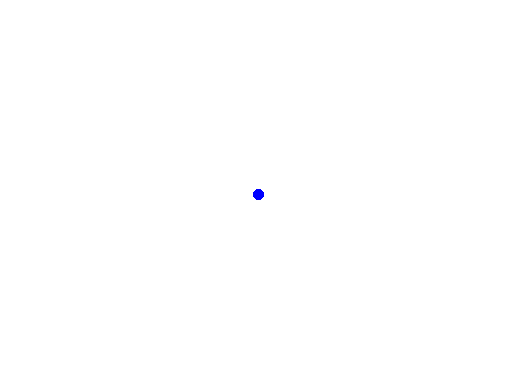

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.colors import LinearSegmentedColormap

def apollonian_gasket(n, imgx, imgy):
    a = np.pi * 2.0 / n
    r = np.sin(a) / np.sin((np.pi - a) / 2.0) / 2.0
    h = np.sqrt(1.0 - r * r)
    xa, xb, ya, yb = -h, h, -h, h

    cx = np.zeros(n + 1)
    cy = np.zeros(n + 1)
    cr = np.zeros(n + 1)

    cx[0], cy[0], cr[0] = 0.0, 0.0, 1.0 - r

    for i in range(n):
        cx[i+1] = np.cos(a * i)
        cy[i+1] = np.sin(a * i)
        cr[i+1] = r

    #maxIt = 100000
    maxIt = 100
    x, y = -2.0, -2.0
    image = np.zeros((imgy, imgx))

    for i in range(maxIt):
        k = np.random.randint(0, n + 1)
        dx = cx[k] - xa
        dy = cy[k] - ya
        d = np.hypot(dx, dy)
        dnew = cr[k] ** 2.0 / d
        x = dnew * dx + xa
        y = dnew * dy + ya
        kx = int((imgx - 1) * (x - xa) / (xb - xa))
        ky = int((imgy - 1) * (y - ya) / (yb - ya))
        if kx >= 0 and kx < imgx and ky >= 0 and ky < imgy:
            image[ky, kx] += 1

    plt.scatter(image[0], image[1], c='blue')

    if save_path:
        plt.savefig(save_path, transparent=True, facecolor='black')
    plt.axis('off')
    plt.axis('equal')
    #return image

save_path = 'apollonian_gasket.png'

# Example usage
imgx, imgy = 800, 600
n = np.random.randint(3, 7)  # Number of main circles
image = apollonian_gasket(3, imgx, imgy)



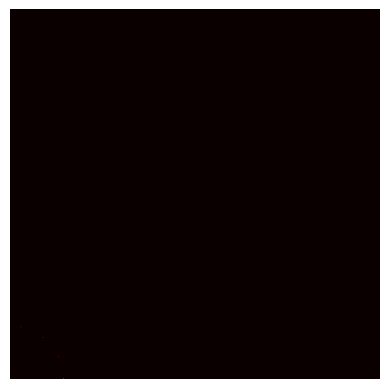

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def apollonian_gasket(n, imgx, imgy):
    a = np.pi * 2.0 / n
    r = np.sin(a) / np.sin((np.pi - a) / 2.0) / 2.0
    h = np.sqrt(1.0 - r * r)
    xa, xb, ya, yb = -h, h, -h, h

    cx = np.zeros(n)
    cy = np.zeros(n)
    cr = np.zeros(n)

    for i in range(n):
        cx[i] = np.cos(a * i)
        cy[i] = np.sin(a * i)
        cr[i] = r

    maxIt = 100000
    image = np.zeros((imgy, imgx))

    for i in range(maxIt):
        k = np.random.randint(0, n)
        dx = cx[k] - xa
        dy = cy[k] - ya
        d = np.hypot(dx, dy)
        dnew = cr[k] ** 2.0 / d
        x = dnew * dx + xa
        y = dnew * dy + ya
        kx = int((imgx - 1) * (x - xa) / (xb - xa))
        ky = int((imgy - 1) * (y - ya) / (yb - ya))
        if kx >= 0 and kx < imgx and ky >= 0 and ky < imgy:
            image[ky, kx] += 1

    return image

def render_gasket(image):
    plt.imshow(image, cmap='hot', origin='lower', extent=(-1, 1, -1, 1))
    plt.axis('off')
    plt.show()

# Example usage
imgx, imgy = 800, 600
n = np.random.randint(3, 7)  # Number of main circles
image = apollonian_gasket(n, imgx, imgy)
render_gasket(image)


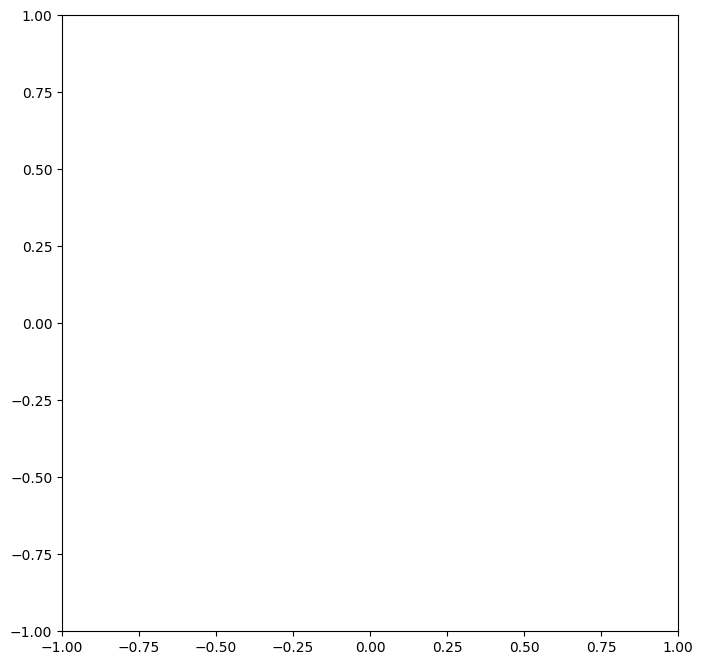

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def apollonian_gasket(n, imgx, imgy):
    a = np.pi * 2.0 / n
    r = np.sin(a) / np.sin((np.pi - a) / 2.0) / 2.0
    h = np.sqrt(1.0 - r * r)
    xa, xb, ya, yb = -h, h, -h, h

    cx = np.zeros(n)
    cy = np.zeros(n)
    cr = np.zeros(n)

    for i in range(n):
        cx[i] = np.cos(a * i)
        cy[i] = np.sin(a * i)
        cr[i] = r

    maxIt = 1000
    circles = []

    for i in range(maxIt):
        k = np.random.randint(0, n)
        dx = cx[k] - xa
        dy = cy[k] - ya
        d = np.hypot(dx, dy)
        dnew = cr[k] ** 2.0 / d
        x = dnew * dx + xa
        y = dnew * dy + ya
        if x**2 + y**2 < (1 - cr[k])**2:  # Only add the circle if it's inside the unit circle
            circles.append((x, y, cr[k]))

    return circles

def render_circles(circles):
    fig, ax = plt.subplots(figsize=(8, 8))
    for circle in circles:
        x, y, r = circle
        circle = plt.Circle((x, y), r, color='r', fill=False)
        ax.add_artist(circle)
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.set_aspect('equal')
    plt.show()

# Example usage
n = np.random.randint(3, 7)  # Number of main circles
circles = apollonian_gasket(n, 800, 800)
render_circles(circles)
